In [31]:
# To see mpas please check below link:
# https://nbviewer.jupyter.org/github/lisardobaena/Coursera_Capstone/blob/master/Granada_Restaurant_Project.ipynb

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Obatining the Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

# 1. Introduction: Business Problem<a name="introduction"></a>

I am from Granada a little city in the south of Spain and for this project I am going to analyse which location would be the best for opening a new restaurant.

Granada is a city full of students due to the importance of the University one of the oldest in Spain. I would like to open a restaurant for young students, where they can from having some beers to buy the daily menu for taking away.

So at first I am going to look for data of different locations in Granada. I will look for at different webs for obtaining data I need.

Once I have the data I will analyse venues in different locations of Granada. At first I will look for University buildings and select those address where there are students.

After this I will classify the top five locations in two groups with Clustering techniques and I will choose the best address attending to the most common venues and the distance to centre of the city.

# 2. Obtaining the Data<a name="data"></a>

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


#!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


#! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [2]:
# Credentials for foursquare

CLIENT_ID = 'BJD25I3TTH53GZPYV0HDCXAIHDRNX05YFKEAWUIGIM5FNLEO' # your Foursquare ID
CLIENT_SECRET = 'RSZQTIQWDJSQIR35BEK1RZDAFGXW4VKLHE2YFSXC4TOEOOYY' # your Foursquare Secret
ACCESS_TOKEN = 'FREJVMCIQJHK4JBEVDET3T0UAY1BZTTUAIL5YHHAYEQZB4XL' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 50
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BJD25I3TTH53GZPYV0HDCXAIHDRNX05YFKEAWUIGIM5FNLEO
CLIENT_SECRET:RSZQTIQWDJSQIR35BEK1RZDAFGXW4VKLHE2YFSXC4TOEOOYY


In [3]:
# I obtained data for different Postal codes and cities of Spain

data = pd.read_excel('C:/Users/LISARDO/Desktop/Coursera/Capstone_Projects/Restaurantes/postalcat.xlsx',sheet_name='Hoja2')
data.head()

,internalid,cp,carrer,poblacio,provinciaid,provincia,paisid,pais
0,1,1193,NaN,Aberasturi,1,Araba/Álava,ES,Espanya
1,2,1013,NaN,Abetxuko,1,Araba/Álava,ES,Espanya
2,3,1449,NaN,Abezia,1,Araba/Álava,ES,Espanya
3,4,1449,NaN,Abornikano,1,Araba/Álava,ES,Espanya
4,5,1427,NaN,Acebedo,1,Araba/Álava,ES,Espanya


In [4]:
# I transform the name of the columns to clarify the content

columnas = ['id','cp','calle','poblacion','provinciaid','provincia','paisid','pais']
data.columns = columnas
data['pais'] = 'España'
data['direccion'] = data["calle"]+ ', ' + data["cp"].astype(str)  + ', ' + data['provincia']
data.head()

,id,cp,calle,poblacion,provinciaid,provincia,paisid,pais,direccion
0,1,1193,NaN,Aberasturi,1,Araba/Álava,ES,España,NaN
1,2,1013,NaN,Abetxuko,1,Araba/Álava,ES,España,NaN
2,3,1449,NaN,Abezia,1,Araba/Álava,ES,España,NaN
3,4,1449,NaN,Abornikano,1,Araba/Álava,ES,España,NaN
4,5,1427,NaN,Acebedo,1,Araba/Álava,ES,España,NaN


In [5]:
# I obtained the data with different streets for Granada capital.

data_gr = data[(data['provincia']=='Granada')&(data['poblacion']=='Granada')].reset_index()
data_gr.drop(['index','id'],1,inplace=True)
data_gr.sample(10)

,cp,calle,poblacion,provinciaid,provincia,paisid,pais,direccion
1853,18011,Puerto Lumbreras,Granada,18,Granada,ES,España,"Puerto Lumbreras, 18011, Granada"
2361,18015,Virgen De La Fuensanta,Granada,18,Granada,ES,España,"Virgen De La Fuensanta, 18015, Granada"
1344,18004,Maria Moliner,Granada,18,Granada,ES,España,"Maria Moliner, 18004, Granada"
1236,18015,Leon Felipe,Granada,18,Granada,ES,España,"Leon Felipe, 18015, Granada"
2185,18009,Sor Cristina Mesa,Granada,18,Granada,ES,España,"Sor Cristina Mesa, 18009, Granada"
384,18006,"Cadiz,avenida (pares Del 2 Al Final)",Granada,18,Granada,ES,España,"Cadiz,avenida (pares Del 2 Al Final), 18006, G..."
1551,18010,"Ortegas,plaza",Granada,18,Granada,ES,España,"Ortegas,plaza, 18010, Granada"
361,18001,"Boqueron,plaza",Granada,18,Granada,ES,España,"Boqueron,plaza, 18001, Granada"
1732,18007,Pingarron,Granada,18,Granada,ES,España,"Pingarron, 18007, Granada"
2216,18013,Tete Monteliu,Granada,18,Granada,ES,España,"Tete Monteliu, 18013, Granada"


In [6]:
# I create a more reduced dataframe only with cp (postal code), provincia and direccion to reduce the number of venues obtained

data_gr_cp = pd.DataFrame({'cp':data_gr['cp'].unique(),'provincia':'Granada','pais':'España'})
data_gr_cp['cp'] = data_gr_cp.astype('str')
data_gr_cp['direccion'] = data_gr_cp["cp"] + ', ' + data_gr_cp['provincia'] + ', ' + data_gr_cp['pais']
data_gr_cp = data_gr_cp.sort_values('cp',ascending = True).reset_index()
data_gr_cp = data_gr_cp.sort_values('cp',ascending = True)
data_gr_cp = data_gr_cp.drop('index',axis=1)
data_gr_cp

,cp,provincia,pais,direccion
0,18001,Granada,España,"18001, Granada, España"
1,18002,Granada,España,"18002, Granada, España"
2,18003,Granada,España,"18003, Granada, España"
3,18004,Granada,España,"18004, Granada, España"
4,18005,Granada,España,"18005, Granada, España"
5,18006,Granada,España,"18006, Granada, España"
6,18007,Granada,España,"18007, Granada, España"
7,18008,Granada,España,"18008, Granada, España"
8,18009,Granada,España,"18009, Granada, España"
9,18010,Granada,España,"18010, Granada, España"


In [9]:
# I obtained the latitude and longitude for each postal code in Granada

latitudes_gr = []
longitudes_gr = []

for i in range(0,len(data_gr_cp)):
    location = geolocator.geocode(data_gr_cp.loc[i,'direccion'])
    latitudes_gr.append(location.latitude)
    longitudes_gr.append(location.longitude)
    print(data_gr_cp.loc[i,'direccion'])

18001, Granada, España
18002, Granada, España
18003, Granada, España
18004, Granada, España
18005, Granada, España
18006, Granada, España
18007, Granada, España
18008, Granada, España
18009, Granada, España
18010, Granada, España
18011, Granada, España
18012, Granada, España
18013, Granada, España
18014, Granada, España
18015, Granada, España
18016, Granada, España
18070, Granada, España
18071, Granada, España
18080, Granada, España


In [10]:
# I complete dataframe of data_gr_cp with latitude and longitude

data_gr_cp['latitude'] = latitudes_gr
data_gr_cp['longitude'] = longitudes_gr

data_gr_cp.head()

,cp,provincia,pais,direccion,latitude,longitude
0,18001,Granada,España,"18001, Granada, España",37.176761,-3.600920
1,18002,Granada,España,"18002, Granada, España",37.174797,-3.604873
2,18003,Granada,España,"18003, Granada, España",37.179166,-3.612516
3,18004,Granada,España,"18004, Granada, España",37.170560,-3.607982
4,18005,Granada,España,"18005, Granada, España",37.169961,-3.599788


In [8]:
# I do a first test for seeing what type of venues I obtained for direccion = 18001, Granada, España.

address = '18001, Granada, España'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

37.17676125037079 -3.6009197431168487


In [11]:
# I create the URL for obtaining Granada venues
radius = 500
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=BJD25I3TTH53GZPYV0HDCXAIHDRNX05YFKEAWUIGIM5FNLEO&client_secret=RSZQTIQWDJSQIR35BEK1RZDAFGXW4VKLHE2YFSXC4TOEOOYY&ll=37.17676125037079,-3.6009197431168487&oauth_token=FREJVMCIQJHK4JBEVDET3T0UAY1BZTTUAIL5YHHAYEQZB4XL&v=20180604&radius=500&limit=50'

In [12]:
results = requests.get(url).json()

In [13]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

<ipython-input-13-5acf500bf9ad>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dataframe = json_normalize(venues)


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress,location.postalCode,location.neighborhood,location.crossStreet
0,4bbc324aafe1b713fc2b304b,Plaza de la Romanilla,"[{'id': '4bf58dd8d48988d164941735', 'name': 'P...",v-1622574805,False,Plaza de la Romanilla,37.176513,-3.600428,"[{'label': 'display', 'lat': 37.17651334910133...",51,ES,Granada,Andalucía,España,"[Plaza de la Romanilla, Granada Andalucía]",NaN,NaN,NaN
1,4d1c7c8dc17ff04d2aebc641,Asadero De La Romanilla,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",v-1622574805,False,Plaza de la Romanilla,37.176667,-3.600443,"[{'label': 'display', 'lat': 37.17666721981283...",43,ES,Granada,Andalucía,España,"[Plaza de la Romanilla, 18001 Granada Andalucía]",18001,NaN,NaN
2,4e86fd43cc21774af1e88805,Giardinos,"[{'id': '4bf58dd8d48988d1c7941735', 'name': 'S...",v-1622574805,False,NaN,37.176954,-3.600259,"[{'label': 'display', 'lat': 37.17695380879994...",62,ES,Granada,Andalucía,España,[Granada Andalucía],NaN,NaN,NaN
3,55d8d1a3498eb815b0589494,Centro Federico García Lorca,"[{'id': '507c8c4091d498d9fc8c67a9', 'name': 'P...",v-1622574805,False,Plaza de La Romanilla SN,37.176705,-3.600381,"[{'label': 'display', 'lat': 37.17670477249231...",48,ES,Granada,Andalucía,España,"[Plaza de La Romanilla SN, 18001 Granada Andal...",18001,NaN,NaN
4,53d6abaa498e2d67265a7a96,Bar Zorongo,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1622574805,False,NaN,37.176676,-3.600489,"[{'label': 'display', 'lat': 37.176676, 'lng':...",39,ES,NaN,NaN,España,NaN,NaN,NaN,NaN


In [14]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,postalCode,neighborhood,crossStreet,id
0,Plaza de la Romanilla,Plaza,Plaza de la Romanilla,37.176513,-3.600428,"[{'label': 'display', 'lat': 37.17651334910133...",51,ES,Granada,Andalucía,España,"[Plaza de la Romanilla, Granada Andalucía]",NaN,NaN,NaN,4bbc324aafe1b713fc2b304b
1,Asadero De La Romanilla,Restaurant,Plaza de la Romanilla,37.176667,-3.600443,"[{'label': 'display', 'lat': 37.17666721981283...",43,ES,Granada,Andalucía,España,"[Plaza de la Romanilla, 18001 Granada Andalucía]",18001,NaN,NaN,4d1c7c8dc17ff04d2aebc641
2,Giardinos,Snack Place,NaN,37.176954,-3.600259,"[{'label': 'display', 'lat': 37.17695380879994...",62,ES,Granada,Andalucía,España,[Granada Andalucía],NaN,NaN,NaN,4e86fd43cc21774af1e88805
3,Centro Federico García Lorca,Public Art,Plaza de La Romanilla SN,37.176705,-3.600381,"[{'label': 'display', 'lat': 37.17670477249231...",48,ES,Granada,Andalucía,España,"[Plaza de La Romanilla SN, 18001 Granada Andal...",18001,NaN,NaN,55d8d1a3498eb815b0589494
4,Bar Zorongo,Café,NaN,37.176676,-3.600489,"[{'label': 'display', 'lat': 37.176676, 'lng':...",39,ES,NaN,NaN,España,NaN,NaN,NaN,NaN,53d6abaa498e2d67265a7a96


In [15]:
# The most repeated places are restaurants and bars so this place looks like a touristic location probably in center of the city.

dataframe_filtered['categories'].value_counts().head()

Spanish Restaurant    5
Tapas Restaurant      4
Bar                   3
Bookstore             3
Café                  2
Name: categories, dtype: int64

In [16]:
# For this location I obtained: 1 General College & University, 1 Elementary School and 1 College Academic Building

locations = ['General College & University', 'Elementary School', 'College Academic Building']
print(dataframe.shape)

dataframe_filtered[dataframe_filtered['categories'].isin(locations)==True]

(50, 18)


,name,categories,address,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,postalCode,neighborhood,crossStreet,id
16,ESADA - Escuela Superior de Arte y Diseño de A...,General College & University,"C/ Trinidad, 4",37.176731,-3.601448,"[{'label': 'display', 'lat': 37.17673139677148...",46,ES,Granada,Andalucía,España,"[C/ Trinidad, 4, 18001 Granada Andalucía]",18001,NaN,NaN,5cffbc17bb8d36002c581e8f


In [17]:
# I create a map for different Postalcodes locations in Granada, taking into account that center of the city is 18001

map_granada = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, address in zip(data_gr_cp['latitude'], data_gr_cp['longitude'], data_gr_cp['direccion']):
    label = '{}'.format(address)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_granada)  
    
map_granada

# 3. Methodology<a name="methodology"></a>

#### For taking the decision on the best place for opening a new student bar in Granada I am going to do the next procedures:

- At first I will explore data for different student locations in Granada (University, Elementary School, Academy, etc.).


- Once I have detected the Addresses with the highest number of student venues I will do an analysis of all the venues in these locations. I will use Foursquare not only at Postal code level, but also at street level. (for trying to obtain enough information).


- At last point for taking a decision I will Cluster these Addresses taking into account the most common venues and I will use the result and the previous analysis for taking a decision.


# 4. Analysis<a name="analysis"></a>

- 4.1: Exploring data for different student locations in Granada


- 4.2: Exploring most common venues in Granada


- 4.3: Clustering Addresses for taking the decision

# 4.1: Exploring data for different student locations in Granada

In [18]:
# I look for venues for this type of locations, in order to identify those places with students (customer objective)

locations = ['University','General College & University', 'Elementary School', 'College Academic Building']

LIMIT= 100

In [19]:
# I create a dataframe with the venues for different Postalcodes en Granada y diferentes locations.

granada_venues2 = pd.DataFrame({'Address':[],'Address Latitude':[],'Address Longitude':[],'Venue':[],'Venue Latitude':[],'Venue Category':[]})

for i in range(0,len(locations)):
    
    search_query = locations[i]
    
    def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
        venues_list=[]
        for name, lat, lng in zip(names, latitudes, longitudes):
            #print(name)
            
        # create the API request URL
            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&query={}&ll={},{}&radius={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION,
                search_query,
                lat, 
                lng, 
                radius, 
                LIMIT)
            
        # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])

        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['Address', 
                      'Address Latitude', 
                      'Address Longitude', 
                      'Venue', 
                      'Venue Latitude', 
                      'Venue Longitude', 
                      'Venue Category']
        
        return(nearby_venues)
        
    granada_venues = getNearbyVenues(names=data_gr_cp['direccion'],
                                   latitudes=data_gr_cp['latitude'],
                                   longitudes=data_gr_cp['longitude']
                                  )
        
    granada_venues2 = granada_venues2.append(granada_venues)
        
        
granada_venues2.head()

,Address,Address Latitude,Address Longitude,Venue,Venue Latitude,Venue Category,Venue Longitude
0,"18001, Granada, España",37.176761,-3.600920,Universidad de Granada (UGR),37.178527,University,-3.602952
1,"18001, Granada, España",37.176761,-3.600920,Facultad de Traducción e Interpretación,37.175528,University,-3.603657
2,"18001, Granada, España",37.176761,-3.600920,Conservatorio Superior de Música,37.179418,University,-3.602112
3,"18002, Granada, España",37.174797,-3.604873,Facultad de Traducción e Interpretación,37.175528,University,-3.603657
4,"18002, Granada, España",37.174797,-3.604873,Facultad Traductores UGR,37.175280,University,-3.602582


In [20]:
granada_venues2.shape

(103, 7)

In [21]:
# I drop duplicates in case of some Venue is in more than one Address

granada_venues2 = granada_venues2.drop_duplicates(subset=['Venue'])

granada_venues2.sample(10)


,Address,Address Latitude,Address Longitude,Venue,Venue Latitude,Venue Category,Venue Longitude
18,"18011, Granada, España",37.199256,-3.600805,Colegio Padre Manjon,37.195976,General College & University,-3.604402
16,"18010, Granada, España",37.180138,-3.595202,E.u La Inmaculada,37.184532,General College & University,-3.594581
26,"18010, Granada, España",37.180138,-3.595202,Centro Ave María S. Cristobal,37.184179,College Academic Building,-3.595911
10,"18005, Granada, España",37.169961,-3.599788,SHM Centro de idiomas curso español,37.171074,University,-3.599774
7,"18012, Granada, España",37.187640,-3.606435,Colegio Los Carmenes,37.188557,Elementary School,-3.604357
20,"18012, Granada, España",37.187640,-3.606435,Centro De Empleo Joven,37.187315,General College & University,-3.602589
34,"18014, Granada, España",37.193018,-3.618041,Edif. Orquídea,37.194508,College Academic Building,-3.623298
1,"18001, Granada, España",37.176761,-3.600920,Escuela Delengua,37.177718,College Academic Building,-3.596519
0,"18001, Granada, España",37.176761,-3.600920,Universidad de Granada (UGR),37.178527,University,-3.602952
2,"18001, Granada, España",37.176761,-3.600920,Palacio Del Almirante (Hogar De San Jose),37.178811,College Academic Building,-3.596450


In [22]:
# Now I am going to group and select those 3 address with more Venues of each type.

granada_venues_group = granada_venues2.groupby(['Address'])['Address Latitude'].count().reset_index()
granada_venues_group = granada_venues_group.rename(columns={'Address Latitude':'Total'})
granada_venues_group = granada_venues_group.sort_values('Total',ascending=False).reset_index()
granada_venues_group = granada_venues_group.drop('index',axis=1)
granada_venues_group

,Address,Total
0,"18001, Granada, España",12
1,"18002, Granada, España",10
2,"18012, Granada, España",8
3,"18005, Granada, España",7
4,"18003, Granada, España",6
5,"18009, Granada, España",4
6,"18011, Granada, España",4
7,"18014, Granada, España",4
8,"18071, Granada, España",4
9,"18010, Granada, España",3


In [23]:
# Now I take the 5 Addresses with the largest number of educational venues

top_addresses = granada_venues_group.loc[0:4,'Address'].values
len(top_addresses)

granada_venues3 = granada_venues2[granada_venues2['Address'].isin(top_addresses)==True]
granada_venues3.sample(10)

,Address,Address Latitude,Address Longitude,Venue,Venue Latitude,Venue Category,Venue Longitude
6,"18002, Granada, España",37.174797,-3.604873,2motivos,37.178230,College Academic Building,-3.606680
11,"18002, Granada, España",37.174797,-3.604873,Academia Lant,37.170673,College Math Building,-3.603486
2,"18001, Granada, España",37.176761,-3.600920,Facultad de Traducción e Interpretación (Palac...,37.175707,General College & University,-3.604095
4,"18002, Granada, España",37.174797,-3.604873,Facultad Traductores UGR,37.175280,University,-3.602582
21,"18012, Granada, España",37.187640,-3.606435,Escuela Arte Granada,37.187153,General College & University,-3.607790
3,"18005, Granada, España",37.169961,-3.599788,CEIP TIERNO GALVÁN,37.168233,Elementary School,-3.599713
9,"18003, Granada, España",37.179166,-3.612516,Biblioteca Caminos,37.181616,General College & University,-3.608155
10,"18005, Granada, España",37.169961,-3.599788,SHM Centro de idiomas curso español,37.171074,University,-3.599774
0,"18001, Granada, España",37.176761,-3.600920,Universidad de Granada (UGR),37.178527,University,-3.602952
9,"18002, Granada, España",37.174797,-3.604873,English American Center,37.173986,College Engineering Building,-3.606715


,Address,Total
0,"18001, Granada, España",12
1,"18002, Granada, España",10
2,"18012, Granada, España",8
3,"18005, Granada, España",7
4,"18003, Granada, España",6


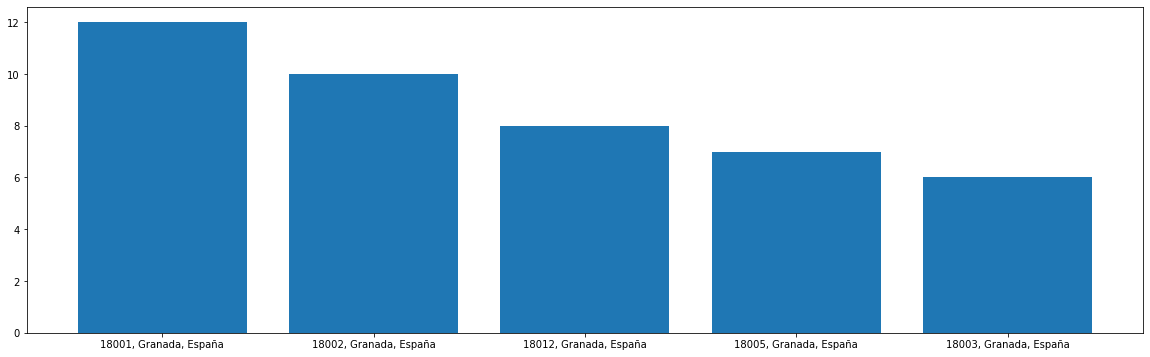

In [24]:
# To sum up the addresses with most student locations in Granada are
import matplotlib.pyplot as plt

plt.figure(figsize=(20,6))
plt.bar(x=granada_venues_group.head(5)['Address'],height=granada_venues_group.head(5)['Total'] )


granada_venues_group.head(5)

# 4.2: Exploring most common venues in Granada

In [25]:
LIMIT= 100

In [26]:
#Create function to know how many venues there are in Granada

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Address', 
                  'Address Latitude', 
                  'Address Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [27]:
import warnings
warnings.filterwarnings("ignore")

cp_list = [18001,18002,18012,18005,18003]
data_gr2 = data_gr[data_gr['cp'].isin(cp_list)==True].reset_index()
data_gr2 = data_gr2.drop('index',axis=1)
data_gr2['cp'] = data_gr2['cp'].astype('str')
data_gr2.head()

,cp,calle,poblacion,provinciaid,provincia,paisid,pais,direccion
0,18012,Abanilla,Granada,18,Granada,ES,España,"Abanilla, 18012, Granada"
1,18005,Aben Humeya,Granada,18,Granada,ES,España,"Aben Humeya, 18005, Granada"
2,18005,Abu Isac,Granada,18,Granada,ES,España,"Abu Isac, 18005, Granada"
3,18005,"Acequia Gorda,callejon",Granada,18,Granada,ES,España,"Acequia Gorda,callejon, 18005, Granada"
4,18001,Acera De Canasteros,Granada,18,Granada,ES,España,"Acera De Canasteros, 18001, Granada"


In [28]:
# Once I have seen what 5 locations would be the best for opening my restaurant I am going to analyse the venues for them.

data_gr_cp2 = data_gr_cp[data_gr_cp['direccion'].isin(top_addresses)==True].reset_index()
data_gr_cp2 = data_gr_cp2.drop('index',axis=1)
data_gr_cp2

,cp,provincia,pais,direccion,latitude,longitude
0,18001,Granada,España,"18001, Granada, España",37.176761,-3.600920
1,18002,Granada,España,"18002, Granada, España",37.174797,-3.604873
2,18003,Granada,España,"18003, Granada, España",37.179166,-3.612516
3,18005,Granada,España,"18005, Granada, España",37.169961,-3.599788
4,18012,Granada,España,"18012, Granada, España",37.187640,-3.606435


In [29]:
# I complete dataframe with latitude and longitude

data_gr3 = data_gr2.merge(data_gr_cp2, on = 'cp', how='left')
data_gr3 = data_gr3.drop(['provincia_y','pais_y'],axis=1)
data_gr3.rename(columns={'provincia_x':'provincia','pais_x':'pais', 'direccion_x':'Address','direccion_y':'Address2'},inplace=True)
data_gr3.head()

,cp,calle,poblacion,provinciaid,provincia,paisid,pais,Address,Address2,latitude,longitude
0,18012,Abanilla,Granada,18,Granada,ES,España,"Abanilla, 18012, Granada","18012, Granada, España",37.187640,-3.606435
1,18005,Aben Humeya,Granada,18,Granada,ES,España,"Aben Humeya, 18005, Granada","18005, Granada, España",37.169961,-3.599788
2,18005,Abu Isac,Granada,18,Granada,ES,España,"Abu Isac, 18005, Granada","18005, Granada, España",37.169961,-3.599788
3,18005,"Acequia Gorda,callejon",Granada,18,Granada,ES,España,"Acequia Gorda,callejon, 18005, Granada","18005, Granada, España",37.169961,-3.599788
4,18001,Acera De Canasteros,Granada,18,Granada,ES,España,"Acera De Canasteros, 18001, Granada","18001, Granada, España",37.176761,-3.600920


In [30]:
#List of different venues for locations list in Granada
granada_venues = getNearbyVenues(names=data_gr3['Address'],
                                   latitudes=data_gr3['latitude'],
                                   longitudes=data_gr3['longitude']
                                  )

In [31]:
granada_venues.head()

,Address,Address Latitude,Address Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Abanilla, 18012, Granada",37.18764,-3.606435,Altamura,37.185696,-3.608758,Italian Restaurant
1,"Abanilla, 18012, Granada",37.18764,-3.606435,LA SACRISTÍA,37.186299,-3.607592,Spanish Restaurant
2,"Abanilla, 18012, Granada",37.18764,-3.606435,"Pizzeria ""La Nonna""",37.190616,-3.609405,Pizza Place
3,"Abanilla, 18012, Granada",37.18764,-3.606435,Mariano El Pescador,37.190621,-3.608553,Tapas Restaurant
4,"Abanilla, 18012, Granada",37.18764,-3.606435,Carrefour Market,37.185735,-3.606321,Supermarket


In [32]:
granada_onehot = pd.get_dummies(granada_venues[['Venue Category']], prefix="", prefix_sep="")
granada_onehot.insert(0, 'Address', granada_venues['Address'])
granada_onehot.head()

,Address,Bakery,Bar,Bed & Breakfast,Beer Garden,Bistro,Bookstore,Botanical Garden,Breakfast Spot,Brewery,...,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Theater,Toy / Game Store,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar,Winery
0,"Abanilla, 18012, Granada",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Abanilla, 18012, Granada",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Abanilla, 18012, Granada",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Abanilla, 18012, Granada",0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,"Abanilla, 18012, Granada",0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [33]:
granada_onehot2 = granada_onehot.merge(data_gr3,on = 'Address', how='left')
granada_onehot2 = granada_onehot2.drop(['calle','poblacion','provinciaid','provincia','paisid','pais','latitude','longitude','Address2'],axis=1)
granada_onehot2.insert(0, 'CP', granada_onehot2['cp'])
granada_onehot2.drop('cp',axis=1,inplace=True)
granada_onehot2.sample(10)

,CP,Address,Bakery,Bar,Bed & Breakfast,Beer Garden,Bistro,Bookstore,Botanical Garden,Breakfast Spot,...,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Theater,Toy / Game Store,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar,Winery
14386,18001,"Lopez Rubio, 18001, Granada",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2890,18001,"Arjona,callejon, 18001, Granada",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13127,18001,"Isleta De San Felipe, 18001, Granada",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23366,18005,"Ribera Del Genil, 18005, Granada",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19759,18003,Pedro Antonio De Alarcon (impares Del 65 Al Fi...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14576,18001,"Lucena,callejon, 18001, Granada",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18027,18001,"Natalio Rivas, 18001, Granada",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28564,18001,"TriviÑo,placeta, 18001, Granada",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12954,18005,"Humilladero,plaza, 18005, Granada",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23669,18002,"Sainz Cantero,pasaje, 18002, Granada",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# I study the mean of the frequency for each category

granada_grouped = granada_onehot2.groupby('CP').mean().reset_index()
granada_grouped

,CP,Bakery,Bar,Bed & Breakfast,Beer Garden,Bistro,Bookstore,Botanical Garden,Breakfast Spot,Brewery,...,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Theater,Toy / Game Store,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar,Winery
0,18001,0.01,0.050000,0.020000,0.000000,0.000000,0.010000,0.010000,0.000000,0.00000,...,0.00000,0.010000,0.140000,0.03,0.010000,0.010000,0.000000,0.000000,0.01,0.000000
1,18002,0.00,0.048387,0.032258,0.000000,0.000000,0.016129,0.016129,0.000000,0.00000,...,0.00000,0.016129,0.145161,0.00,0.000000,0.000000,0.016129,0.000000,0.00,0.000000
2,18003,0.00,0.130435,0.000000,0.000000,0.021739,0.000000,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.239130,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
3,18005,0.00,0.000000,0.000000,0.029412,0.058824,0.000000,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.191176,0.00,0.014706,0.014706,0.014706,0.014706,0.00,0.014706
4,18012,0.00,0.142857,0.000000,0.023810,0.000000,0.000000,0.000000,0.047619,0.02381,...,0.02381,0.000000,0.166667,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000


In [35]:
# I extract the top5 venues for each Neighborhood

num_top_venues = 5

for hood in granada_grouped['CP']:
    print("----"+hood+"----")
    temp = granada_grouped[granada_grouped['CP'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----18001----
                venue  freq
0    Tapas Restaurant  0.14
1  Spanish Restaurant  0.09
2               Hotel  0.07
3               Plaza  0.07
4                 Bar  0.05


----18002----
                venue  freq
0    Tapas Restaurant  0.15
1  Spanish Restaurant  0.06
2               Hotel  0.06
3           Gift Shop  0.05
4                 Bar  0.05


----18003----
                venue  freq
0    Tapas Restaurant  0.24
1                 Bar  0.13
2               Hotel  0.09
3                 Pub  0.09
4  Spanish Restaurant  0.07


----18005----
                venue  freq
0    Tapas Restaurant  0.19
1  Spanish Restaurant  0.12
2               Hotel  0.10
3          Restaurant  0.06
4              Bistro  0.06


----18012----
              venue  freq
0  Tapas Restaurant  0.17
1               Bar  0.14
2        Restaurant  0.10
3              Café  0.10
4             Plaza  0.10




In [36]:
# Function to order the results in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [37]:
# Create a new Dataframe with top 5 venues for each Neighborhood

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['CP']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['CP'] = granada_grouped['CP']

for ind in np.arange(granada_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(granada_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,CP,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,18001,Tapas Restaurant,Spanish Restaurant,Plaza,Hotel,Bar,Café,Tea Room,Moroccan Restaurant,Gift Shop,Concert Hall
1,18002,Tapas Restaurant,Spanish Restaurant,Hotel,Plaza,Bar,Japanese Restaurant,Coffee Shop,Gift Shop,Café,Record Shop
2,18003,Tapas Restaurant,Bar,Pub,Hotel,Spanish Restaurant,Gym,Department Store,Restaurant,Food & Drink Shop,Italian Restaurant
3,18005,Tapas Restaurant,Spanish Restaurant,Hotel,Bistro,Restaurant,Plaza,Coffee Shop,Café,Pub,Italian Restaurant
4,18012,Tapas Restaurant,Bar,Café,Plaza,Restaurant,Pizza Place,Hotel,Italian Restaurant,Breakfast Spot,Spanish Restaurant


# 4.3: Clustering Addresses for taking the decision

In [38]:
granada_grouped

,CP,Bakery,Bar,Bed & Breakfast,Beer Garden,Bistro,Bookstore,Botanical Garden,Breakfast Spot,Brewery,...,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Theater,Toy / Game Store,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar,Winery
0,18001,0.01,0.050000,0.020000,0.000000,0.000000,0.010000,0.010000,0.000000,0.00000,...,0.00000,0.010000,0.140000,0.03,0.010000,0.010000,0.000000,0.000000,0.01,0.000000
1,18002,0.00,0.048387,0.032258,0.000000,0.000000,0.016129,0.016129,0.000000,0.00000,...,0.00000,0.016129,0.145161,0.00,0.000000,0.000000,0.016129,0.000000,0.00,0.000000
2,18003,0.00,0.130435,0.000000,0.000000,0.021739,0.000000,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.239130,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
3,18005,0.00,0.000000,0.000000,0.029412,0.058824,0.000000,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.191176,0.00,0.014706,0.014706,0.014706,0.014706,0.00,0.014706
4,18012,0.00,0.142857,0.000000,0.023810,0.000000,0.000000,0.000000,0.047619,0.02381,...,0.02381,0.000000,0.166667,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000


In [39]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 2

granada_grouped_clustering = granada_grouped.drop('CP', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(granada_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 1, 0, 1])

In [44]:
data_gr_cp3 = data_gr_cp2.drop('pais',axis=1)
data_gr_cp3 = data_gr_cp3.rename(columns={'cp':'CP'})
data_gr_cp3.head()

,CP,provincia,direccion,latitude,longitude
0,18001,Granada,"18001, Granada, España",37.176761,-3.600920
1,18002,Granada,"18002, Granada, España",37.174797,-3.604873
2,18003,Granada,"18003, Granada, España",37.179166,-3.612516
3,18005,Granada,"18005, Granada, España",37.169961,-3.599788
4,18012,Granada,"18012, Granada, España",37.187640,-3.606435


In [45]:
neighborhoods_venues_sorted

,CP,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,18001,Tapas Restaurant,Spanish Restaurant,Plaza,Hotel,Bar,Café,Tea Room,Moroccan Restaurant,Gift Shop,Concert Hall
1,18002,Tapas Restaurant,Spanish Restaurant,Hotel,Plaza,Bar,Japanese Restaurant,Coffee Shop,Gift Shop,Café,Record Shop
2,18003,Tapas Restaurant,Bar,Pub,Hotel,Spanish Restaurant,Gym,Department Store,Restaurant,Food & Drink Shop,Italian Restaurant
3,18005,Tapas Restaurant,Spanish Restaurant,Hotel,Bistro,Restaurant,Plaza,Coffee Shop,Café,Pub,Italian Restaurant
4,18012,Tapas Restaurant,Bar,Café,Plaza,Restaurant,Pizza Place,Hotel,Italian Restaurant,Breakfast Spot,Spanish Restaurant


In [47]:
# add clustering labels
neighborhoods_venues_sorted['ClusterLabels'] = kmeans.labels_

granada_merged = data_gr_cp3

# merge granada_grouped with granada_data to add latitude/longitude for each neighborhood
granada_merged = granada_merged.join(neighborhoods_venues_sorted.set_index('CP'), on='CP')

granada_merged = granada_merged.dropna()

granada_merged

,CP,provincia,direccion,latitude,longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,ClusterLabels
0,18001,Granada,"18001, Granada, España",37.176761,-3.600920,Tapas Restaurant,Spanish Restaurant,Plaza,Hotel,Bar,Café,Tea Room,Moroccan Restaurant,Gift Shop,Concert Hall,0
1,18002,Granada,"18002, Granada, España",37.174797,-3.604873,Tapas Restaurant,Spanish Restaurant,Hotel,Plaza,Bar,Japanese Restaurant,Coffee Shop,Gift Shop,Café,Record Shop,0
2,18003,Granada,"18003, Granada, España",37.179166,-3.612516,Tapas Restaurant,Bar,Pub,Hotel,Spanish Restaurant,Gym,Department Store,Restaurant,Food & Drink Shop,Italian Restaurant,1
3,18005,Granada,"18005, Granada, España",37.169961,-3.599788,Tapas Restaurant,Spanish Restaurant,Hotel,Bistro,Restaurant,Plaza,Coffee Shop,Café,Pub,Italian Restaurant,0
4,18012,Granada,"18012, Granada, España",37.187640,-3.606435,Tapas Restaurant,Bar,Café,Plaza,Restaurant,Pizza Place,Hotel,Italian Restaurant,Breakfast Spot,Spanish Restaurant,1


In [48]:
granada_merged['ClusterLabels'] = granada_merged['ClusterLabels'].astype('int64')

In [50]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [53]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(granada_merged['latitude'], granada_merged['longitude'], granada_merged['CP'], granada_merged['ClusterLabels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [54]:
# Now I examine the different Clusters student locations in Granada - Cluster 0

granada_merged.loc[granada_merged['ClusterLabels'] ==0, granada_merged.columns[[2] + list(range(5, granada_merged.shape[1]))]]


,direccion,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,ClusterLabels
0,"18001, Granada, España",Tapas Restaurant,Spanish Restaurant,Plaza,Hotel,Bar,Café,Tea Room,Moroccan Restaurant,Gift Shop,Concert Hall,0
1,"18002, Granada, España",Tapas Restaurant,Spanish Restaurant,Hotel,Plaza,Bar,Japanese Restaurant,Coffee Shop,Gift Shop,Café,Record Shop,0
3,"18005, Granada, España",Tapas Restaurant,Spanish Restaurant,Hotel,Bistro,Restaurant,Plaza,Coffee Shop,Café,Pub,Italian Restaurant,0


In [55]:
# Now I examine the different Clusters student locations in Granada - Cluster 1

granada_merged.loc[granada_merged['ClusterLabels'] ==1, granada_merged.columns[[2] + list(range(5, granada_merged.shape[1]))]]


,direccion,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,ClusterLabels
2,"18003, Granada, España",Tapas Restaurant,Bar,Pub,Hotel,Spanish Restaurant,Gym,Department Store,Restaurant,Food & Drink Shop,Italian Restaurant,1
4,"18012, Granada, España",Tapas Restaurant,Bar,Café,Plaza,Restaurant,Pizza Place,Hotel,Italian Restaurant,Breakfast Spot,Spanish Restaurant,1


# 5. Results and Discussion<a name="results"></a>

My analysis shows that if the city of Granada has some type of venue these are Bars and Restaurant, so at first sight opening a new one could be difficult due to a lot of competitors. So as strategy of my businness I am going to be focus on those places where there are students buildings and as consequence young people (Objective customer).

I have look for using Foursquare and a loop those places in Granada with the highest number of venues included in a list of common student buildings. Some of the buildings included are: Univeristy. College Academic Building or Elementary School. Once I obtained the result I choose the top5 Addresses according with the highest number of student buildings. 

**The results are:**

- **18001, Granada, España >> 12 student buildings**
- **18002, Granada, España >> 10 student buildings**
- **18012, Granada, España >> 8 student buildings**
- **18005, Granada, España >> 7 student buildings**
- **18003, Granada, España >> 8 student buildings**

Once I have identified these Addresses I did an analysis of most common venues in each zone but this time not only by Postal Code. To obtain an number of venues to realise a good analysis, I look for venues for all the streets included in this Postal Codes. The results obtained show that the most common venues in Granada are all type of restaurants and bars, so the decision for opening this type of venue in Granada is difficult.

Finally I did a Cluster analysis for trying to group the top5 student locations according to their most common venues. Due to in every places the most common venues are the same Cluster in different groups was really difficult and I decided only 2 Clusters. The results differentiate these locations in two groups, taking into account the distance to the city centre where the rental prices are higher.

**The results are:**

**Cluster 0, In the center of the city:**
- 18001, Granada, España
- 18002, Granada, España
- 18005, Granada, España

**Cluster 1, Not in the center of the city:**
- 18003, Granada, España
- 18012, Granada, España

# 6. Conclusion<a name="conclusion"></a>

# After analysing I think that the best place for opening a new restaurant is >> <font color='red'>18012, Granada, España.

#### The reasons are the next:
- This is the third location with more student places >> 8 student builidings.
- This is included in the Cluster of "Not in the center of the city" >> Probably will be the place with lowest rental prices

It is really difficult to take the correct decision but I think according to the Analysis I have done probably this be the best one.

,Address,Total
0,"18001, Granada, España",12
1,"18002, Granada, España",10
2,"18012, Granada, España",8
3,"18005, Granada, España",7
4,"18003, Granada, España",6


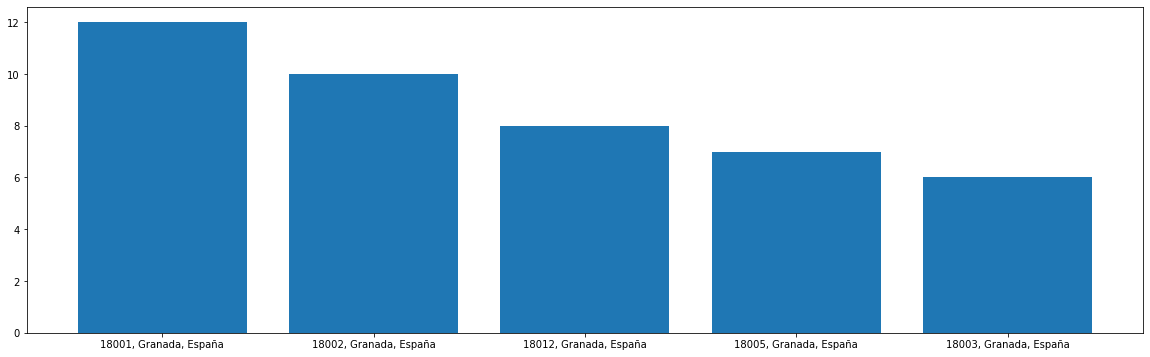

In [56]:
# To sum up the addresses with most student locations in Granada are
import matplotlib.pyplot as plt

plt.figure(figsize=(20,6))
plt.bar(x=granada_venues_group.head(5)['Address'],height=granada_venues_group.head(5)['Total'] )


granada_venues_group.head(5)